IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Noura ALJANE

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



<font size="+1" color="RED">**ATTENTION : Le temps d'execution du projet est d'environ 9 minutes.**</font></br>
Pour que le projet prenne moins de temps il faut augmenter le pas à 100 pour la fonction qui calcule le k optimal pour les données 2D ou 5D.

## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline 

# Importation de la librair ie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)
10
# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
# lecture des donnéees en dimension 2 dans un dataframe pandas
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2', 'x3', 'x4', 'x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)

In [2]:
tps3 = time.time()

In [3]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [4]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [5]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [6]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [7]:
X5D[0:5]
len(X5D)

2000



<div class="alert alert-block alert-info">
Pour le projet, j'ai choisi de comparer les ensembles de données 2 à 2 pour chaque algorithme d'apprentissage. Puis de conclure, en comparant les algorithmes entre eux.<br/>
</div>

In [8]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")

        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """ 
        raise NotImplementedError("Please Implement this method")
        
        
            
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # cette qualité est mesurée par le taux de bonne classification du classifieur sur le dataset.
        # C'est donc une valeur de [0,1] qui s'obtient divisant le nombre d'exemples du dataset 
        # qui sont bien classés par le classifieur par le nombre total d'exemples du dataset-
        well_classed =0
        for i in range(len(desc_set)):
            if (self.predict(desc_set[i]) == label_set[i]) :
                well_classed += 1;
        if (len(desc_set) ==0):
            return 0.0
        else :
            return well_classed/len(desc_set)

In [9]:
def genere_dataset_uniform(p, n, binf=-1, bsup=1):
    """ int * int * float^2 -> tuple[ndarray, ndarray]
        Hyp: n est pair
        p: nombre de dimensions de la description
        n: nombre d'exemples de chaque classe
        les valeurs générées uniformément sont dans [binf,bsup]
    """
    composant = np.random.uniform(binf,bsup, (n, p))
    labels = np.asarray([-1 for i in range(n//2)] + [+1 for i in range(n//2)])
    return composant, labels
    
    
def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    """ les valeurs générées suivent une loi normale
        rend un tuple (data_desc, data_labels)
    """
    composant_neg = np.random.multivariate_normal(negative_center, negative_sigma, nb_points)
    composant_pos = np.random.multivariate_normal(positive_center, positive_sigma, nb_points)
    composants = np.concatenate((composant_neg, composant_pos))
    labels = np.asarray([-1 for i in range(nb_points)] + [+1 for i in range(nb_points)])
    return composants, labels
    
def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    data_neg = desc[labels == -1]
    data_pos = desc[labels == +1]
    
    plt.scatter(data_neg[:,0], data_neg[:,1], marker='o', color="red")
    plt.scatter(data_pos[:,0], data_pos[:,1], marker='x', color="blue")


def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])
    
    
def genere_train_test(desc_set, label_set, n_pos, n_neg):
    """ permet de générer une base d'apprentissage et une base de test
        desc_set: ndarray avec des descriptions
        label_set: ndarray avec les labels correspondants
        n_pos: nombre d'exemples de label +1 à mettre dans la base d'apprentissage
        n_neg: nombre d'exemples de label -1 à mettre dans la base d'apprentissage
        Hypothèses: 
           - desc_set et label_set ont le même nombre de lignes)
           - n_pos et n_neg, ainsi que leur somme, sont inférieurs à n (le nombre d'exemples dans desc_set)
       """
    desc_pos = [desc_set[i] for i in range(len(desc_set)) if label_set[i]>=0]
    desc_neg = [desc_set[i] for i in range(len(desc_set)) if label_set[i]<0]
    pos1 = random.sample(desc_pos, n_pos)
    neg1 = random.sample(desc_neg, n_neg)
    for i in pos1:
        for j in range(len(desc_pos)):
            if (i==desc_pos[j]).all():
                desc_pos.pop(j)
                break
    for i in neg1:
        for j in range(len(desc_neg)):
            if (i==desc_neg[j]).all():
                desc_neg.pop(j)
                break
    desc_appr = np.asarray(pos1+neg1)
    label_appr = np.asarray([1]*n_pos+[-1]*n_neg)
    desc_test = np.asarray(desc_pos+desc_neg)
    label_test = np.asarray([1]*len(desc_pos)+[-1]*len(desc_neg))
    return (desc_appr,label_appr),(desc_test,label_test)
        

def analyse_perfs(L):
    """ L : liste de nombres réels non vide
        rend le tuple (moyenne, écart-type)
    """
    return np.mean(L), np.std(L)   


In [10]:
def crossval(X, Y, n_iterations, iteration):
    start, end = iteration*int(len(Y)/n_iterations), (iteration+1)*int(len(Y)/n_iterations)
    Xtrain = np.delete(X, np.s_[start:end], axis=0)
    Ytrain = np.delete(Y, np.s_[start:end], axis=0)
    Xtest = X[start:end]
    Ytest = Y[start:end]
    return Xtrain, Ytrain, Xtest, Ytest

def crossval_strat(X, Y, n_iterations, iteration):
    Xtrain1, Ytrain1, Xtest1, Ytest1 = crossval(X[Y==-1], Y[Y==-1], n_iterations, iteration)
    Xtrain2, Ytrain2, Xtest2, Ytest2 = crossval(X[Y==+1], Y[Y==+1], n_iterations, iteration)
    Xtrain = np.concatenate((Xtrain1, Xtrain2))
    Ytrain = np.concatenate((Ytrain1, Ytrain2))
    Xtest = np.concatenate((Xtest1, Xtest2))
    Ytest = np.concatenate((Ytest1, Ytest2))
    return Xtrain, Ytrain, Xtest, Ytest

# Algorithme des k plus proches voisins

In [11]:

import math as m
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        self.desc_set = None
        self.label_set = None
  
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        
        tab_dist = []
        desc = self.desc_set 
        
        
        for i in range(len(desc)):
            somme = 0
            for j in range(self.input_dimension):
                 somme += (desc[i][j] - x[j])**2
            dist = m.sqrt(somme)
            tab_dist.append(dist)
            
        tab_ind = np.argsort(tab_dist)
        
        cpt = 0
        for i in range(self.k):
            if self.label_set[tab_ind[i]] == 1:
                cpt += 1
                
        return 2*((cpt/self.k)-0.5)
                
        
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        y = self.score(x)
        if(y<0):
            return -1
        else :
            return 1
        
        

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set

## Données 2D

#### <div class="alert alert-block alert-info">Pour commencer, testons l'algo KNN avec k =30
    
    
    
    
</div>

Accuracy:  0.927


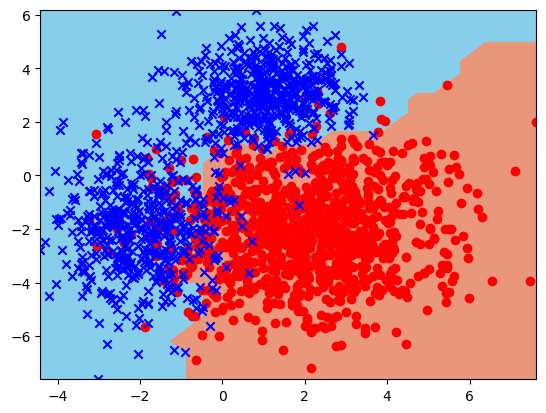

In [12]:
# Création d'un knn avec k=1 et 2 dimensions pour les données
classifierKNN = ClassifierKNN(2,11)

# Entraînement du classifier:
classifierKNN.train(X2D, Y2D)

# Affichage de la frontière de séparation des classes
plot_frontiere(X2D, Y2D,classifierKNN)
plot2DSet(X2D, Y2D)

# Performance de ce classifieur:
print("Accuracy: ",classifierKNN.accuracy(X2D, Y2D))

<div class="alert alert-block alert-info"> Pour pouvoir tester différentes valeurs de k de manière optimisée nous pouvons utilisée le principe de la <b> validation croisée</b> pour différentes valeurs de k. Nous définissons un seuil max de k car il y a beaucoup de données.
Par la même occasion, on calcule le temps d'éxecution.</div>

In [13]:
def crossval(X, Y, n_iterations, iteration):
    start, end = iteration*int(len(Y)/n_iterations), (iteration+1)*int(len(Y)/n_iterations)
    Xtrain = np.delete(X, np.s_[start:end], axis=0)
    Ytrain = np.delete(Y, np.s_[start:end], axis=0)
    Xtest = X[start:end]
    Ytest = Y[start:end]
    return Xtrain, Ytrain, Xtest, Ytest



#### ATTENTION L'EXECUTION DE CETTE CELL PREND DU TEMPS : 
Pour éviter cela augmenter le pas de 10 à 100 ou ne pas l'exécuter.

In [14]:
#-----------Calcul du K optimal--------#


seuil_k = len(X2D) //10
valeurs_k = [k for k in range(1,seuil_k,10)]

KNN = ClassifierKNN(2, 1)
KNN.train(X2D, Y2D)

accuracies = []
for k in range(1, seuil_k, 10):
    KNN.k = k
    accuracies_k = []
    for i in range(10):
        Xapp,Yapp,Xtest,Ytest = crossval(X2D, Y2D, 10, i)
        KNN.train(Xapp, Yapp)
        accuracies_k.append(KNN.accuracy(Xtest,Ytest))
    accuracies.append(np.mean(accuracies_k))

k_optimal = 1
max_accuracy = 0
for i in range(len(accuracies)):
    if accuracies[i] > max_accuracy:
        max_accuracy = accuracies[i]
        k_optimal = 1 + i * 10

print("k optimal =", k_optimal)

k optimal = 11


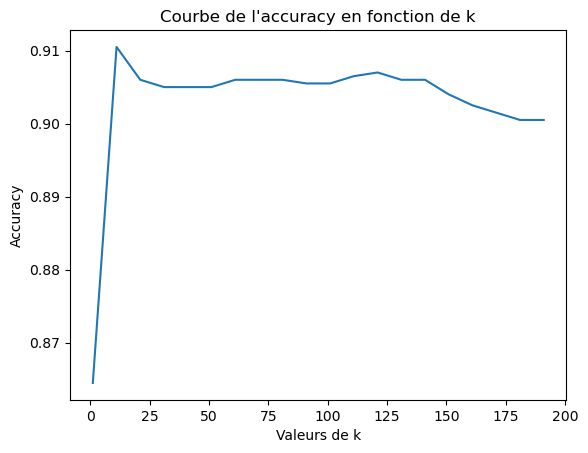

In [15]:
plt.plot(valeurs_k, accuracies)
plt.xlabel('Valeurs de k')
plt.ylabel('Accuracy')
plt.title('Courbe de l\'accuracy en fonction de k')
plt.show()

Accuracy:  0.927


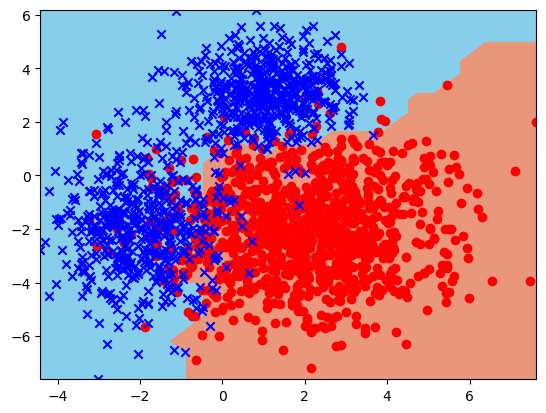

In [16]:
classifierKNN = ClassifierKNN(2,k_optimal)

classifierKNN.train(X2D, Y2D)

# Affichage de la frontière de séparation des classes
plot_frontiere(X2D, Y2D,classifierKNN)
plot2DSet(X2D, Y2D)

# Performance de ce classifieur:
print("Accuracy: ",classifierKNN.accuracy(X2D, Y2D))

In [17]:
niter = 10
accurarcies = []
tps1 = time.time()

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(X2D, Y2D, niter, i)
    perceptron = ClassifierKNN(2, k_optimal)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))

tps2 = time.time()    
print("Accuracies ",accuracies)
print("Temps d'éxecution avec le koptimal sur les données 2D avec validation croisée : ", tps2-tps1)

Accuracies  [0.8644999999999999, 0.9105000000000001, 0.906, 0.9049999999999999, 0.905, 0.905, 0.906, 0.906, 0.906, 0.9055000000000002, 0.9055, 0.9065, 0.907, 0.9059999999999999, 0.9059999999999999, 0.9039999999999999, 0.9025000000000001, 0.9015000000000001, 0.9005000000000001, 0.9005000000000001, 0.88, 0.95, 0.875, 0.9, 0.885, 0.87, 0.895, 0.92, 0.96, 0.97]
Temps d'éxecution avec le koptimal sur les données 2D avec validation croisée :  5.0008134841918945


In [18]:
print(analyse_perfs(accuracies))

(0.9054833333333334, 0.02199336389812971)


## Données 5D

#### ATTENTION L'EXECUTION DE CETTE CELLULE DE CODE PREND DU TEMPS (environ 3 minutes) : 
Pour éviter cela augmenter le pas de 10 à 100 ou ne pas l'exécuter.

In [19]:
tps1 = time.time()

seuil_k = len(X5D) // 10
valeurs_k = [k for k in range(1,seuil_k,10)]

KNN = ClassifierKNN(5, 1)

accuracies = []
for k in range(1, seuil_k, 10):
    KNN.k = k
    accuracies_k = []
    for i in range(10):
        Xapp,Yapp,Xtest,Ytest = crossval(X5D, Y5D, 10, i)
        KNN.train(Xapp, Yapp)
        accuracies_k.append(KNN.accuracy(Xtest,Ytest))
    accuracies.append(np.mean(accuracies_k))

k_optimal = 1
max_accuracy = 0
for i in range(len(accuracies)):
    if accuracies[i] > max_accuracy:
        max_accuracy = accuracies[i]
        k_optimal = 1 + i * 10

tps2 = time.time()

print("Le k optimal est", k_optimal)
print("Temps d'éxecution pour trouver le k optimal avec validation croisée : ", tps2-tps1)

Le k optimal est 11
Temps d'éxecution pour trouver le k optimal avec validation croisée :  206.54784297943115


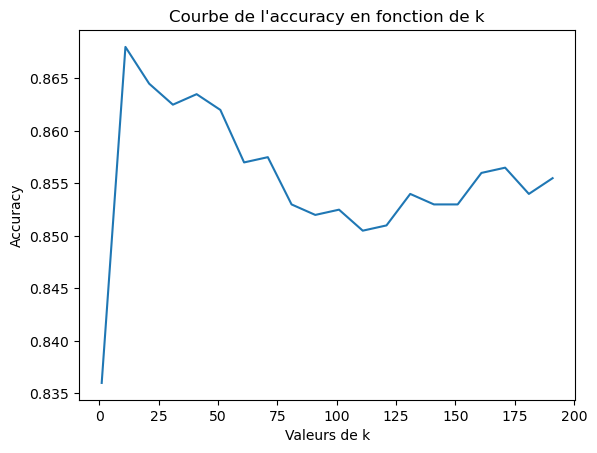

In [20]:
plt.plot(valeurs_k, accuracies)
plt.xlabel('Valeurs de k')
plt.ylabel('Accuracy')
plt.title('Courbe de l\'accuracy en fonction de k')
plt.show()

In [21]:
classifierKNN = ClassifierKNN(5,k_optimal)

classifierKNN.train(X5D, Y5D)
print("Accuracy: ",classifierKNN.accuracy(X5D, Y5D))

Accuracy:  0.8965


In [22]:
print(analyse_perfs(accuracies))

(0.8555999999999999, 0.006594694837519013)


<div class="alert alert-block alert-info">Même conclusion que pour les données 2D mais on s'aperçois ici que les performances diminuent encore plus avec la croissance de la valeur du k. La moyenne des performances peut être moins bonnes que celle des données 2D mais l'écart type est plus faible.</div>

# Perceptron

In [23]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
       
        if (init):
            self.w = np.zeros(input_dimension)
        else:
            self.w = (np.random.uniform(0,1,input_dimension)*2-1)*0.001
        self.allw =[self.w.copy()]
        #print("Init perceptron: w=",self.w)
        
    def get_allw(self):
        return self.allw
          
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        l = [i for i in range (len(desc_set))]
        desc_rand = np.random.shuffle(l)
        for i in l:
            if self.predict(desc_set[i]) != label_set[i]:
                self.w = self.w + desc_set[i]*label_set[i]*self.learning_rate
                self.allw.append(np.copy(self.w))
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        norm_list = []
        w_original = self.w.copy()
        for i in range(nb_max):
            self.train_step(desc_set, label_set)
            w_prim = self.w.copy()
            norm = np.linalg.norm(w_original - w_prim)
            norm_list.append(norm)
            if norm<seuil:
                break
        return norm_list
                
            
        
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x, self.w)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        y = self.score(x)
        if np.all(y<0):
            return -1
        else :
            return 1
        


## Données 2D

<div class="alert alert-block alert-info"> On cherche le learning rate qui nous donnerait la meilleure performance pour l'algorithme du perceptron de Rosenblatt.<br>
    Il y a 2 cas d'initialisation : Le vecteur de paramètre <b>w</b> est initialisé comme vecteur nul ou aléatoirement.</div>

### 1er cas : vecteur nul

<div class="alert alert-block alert-info">Pour commencer on peut tester avec un learning rate égal à 0.1</div>

Accuracy :  0.7075


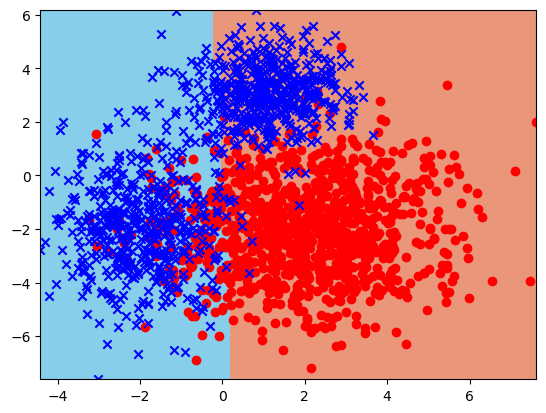

In [24]:
perceptron1 = ClassifierPerceptron(2, learning_rate=0.1, init=True)

perceptron1.train(X2D, Y2D)
print("Accuracy : ", perceptron1.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
plot_frontiere(X2D,Y2D,perceptron1,step=60)
plot2DSet(X2D,Y2D)

In [25]:
lrs = [0.01, 0.1, 1]

# Validation croisée pour chaque learning rate
best_lr = None
best_acc = 0
which_i = 0
for lr in lrs:
    accuracies = []
    for i in range(10):
        X_train, Y_train, X_val, Y_val = crossval_strat(X2D, Y2D, 10, i)
        perceptron = ClassifierPerceptron(2, lr, True)
        perceptron.train(X_train, Y_train)
        accuracy = perceptron.accuracy(X_val, Y_val)
        accuracies.append(accuracy)
        if accuracy> best_acc:
            best_acc = accuracy
            best_lr = lr
            which_i = i

print("Learning rate optimal :", best_lr)
print("Meilleure accuracy :", best_acc)
print("Pour l'itération : ", i)

Learning rate optimal : 0.01
Meilleure accuracy : 0.97
Pour l'itération :  9


Accuracy :  0.985


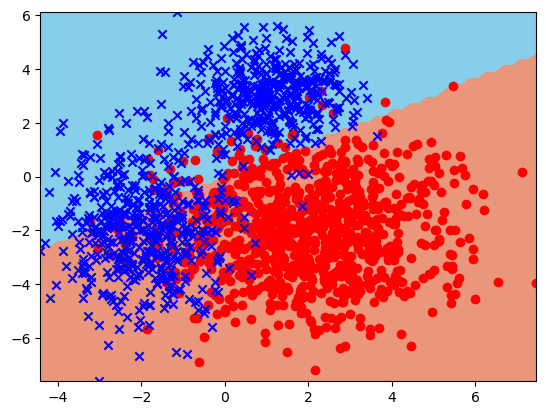

In [26]:
perceptron1 = ClassifierPerceptron(2, best_lr, init=True)
X_train, Y_train, X_val, Y_val = crossval_strat(X2D, Y2D, 10, which_i)
perceptron1.train(X_train, Y_train)
print("Accuracy : ", perceptron1.accuracy(X_val,Y_val))

# Affichage de la frontière de séparation des classes
plot_frontiere(X_train,Y_train,perceptron1,step=60)
plot2DSet(X_train,Y_train)

On trouve une bonne valeur pour l'accuracy mais on ne sait pas si le modèle converge. Voyons combien d'itérations sont nécessaires pour que ça soit le cas et testons encore le modèle avec différentes valeurs pour le learning rate et le nombre d'itérations maximum:

Nb iterations:  100


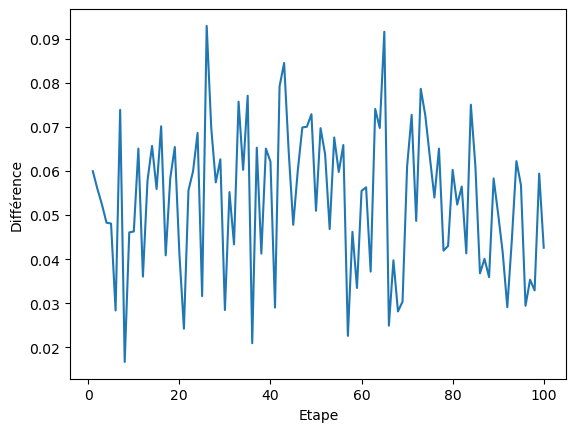

Accuracy finale (train):  0.815
Accuracy finale (test) :  0.84


In [27]:
learning_rate = 0.01
perceptron = ClassifierPerceptron(2, learning_rate, True)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations =  perceptron.train(data_train, label_train)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )


Nb iterations:  1000


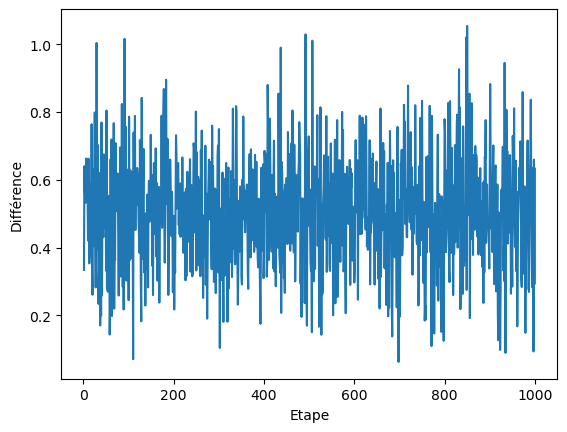

Accuracy finale (train):  0.77
Accuracy finale (test) :  0.7661111111111111


In [28]:

learning_rate = 0.1
perceptron = ClassifierPerceptron(2, learning_rate, True)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)
data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


# Apprentissage du perceptron
les_variations = perceptron.train(data_train, label_train, nb_max=1000)
print("Nb iterations: ",len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )



Nb iterations:  148


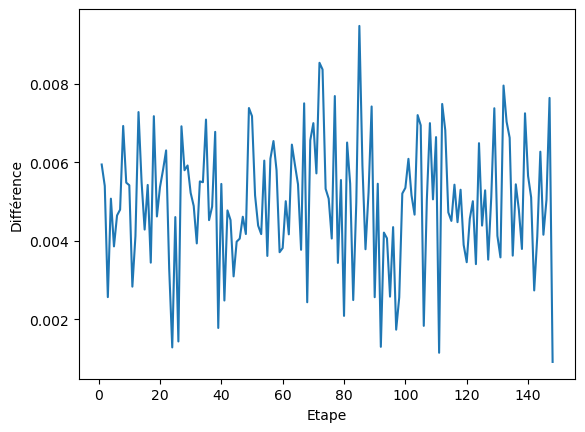

Accuracy finale (train):  0.805
Accuracy finale (test) :  0.7877777777777778


In [29]:
learning_rate = 0.001
perceptron = ClassifierPerceptron(2, learning_rate, True)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)
data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


# Apprentissage du perceptron
les_variations = perceptron.train(data_train, label_train, nb_max=1000)
print("Nb iterations: ",len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )



Nb iterations:  1000


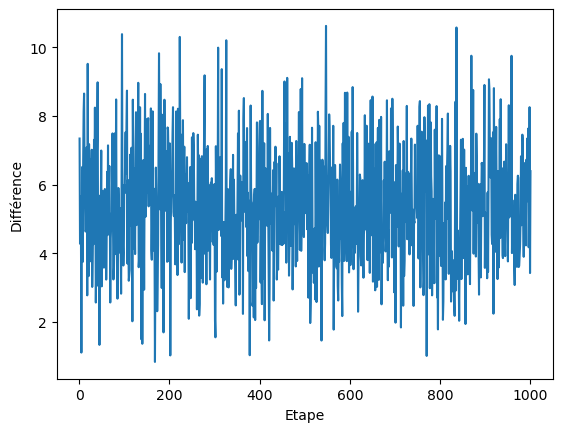

Accuracy finale (train):  0.51
Accuracy finale (test) :  0.5544444444444444


In [30]:
learning_rate = 1
perceptron = ClassifierPerceptron(2, learning_rate, True)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)
data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


# Apprentissage du perceptron
les_variations = perceptron.train(data_train, label_train, nb_max=1000)
print("Nb iterations: ",len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )



### 2eme cas : initialisation aléatoire


<div class="alert alert-block alert-info">Même chose, on commence par tester avec un learning rate égal à 0.1, puis on compare avec d'autres valeurs. On observe ensuite les résultats au niveau de la convergence du modèle</div>


Accuracy :  0.537


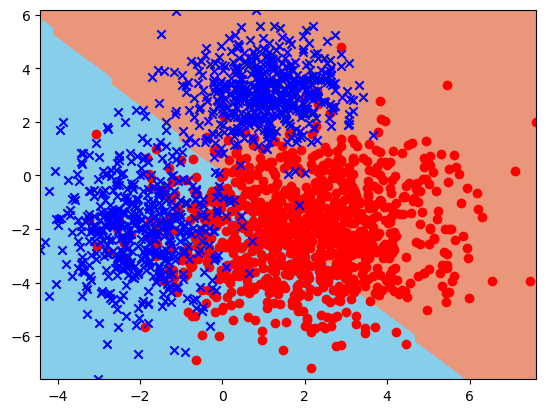

In [31]:
perceptron1 = ClassifierPerceptron(2, learning_rate=0.1, init=False)

perceptron1.train(X2D, Y2D)
print("Accuracy : ", perceptron1.accuracy(X2D,Y2D))

# Affichage de la frontière de séparation des classes
plot_frontiere(X2D,Y2D,perceptron1,step=60)
plot2DSet(X2D,Y2D)

In [32]:
lrs = [0.01, 0.1, 1]

# Validation croisée pour chaque learning rate
best_lr = None
best_acc = 0
which_i = 0
for lr in lrs:
    accuracies = []
    for i in range(10):
        X_train, Y_train, X_val, Y_val = crossval_strat(X2D, Y2D, 10, i)
        perceptron = ClassifierPerceptron(2, lr, False)
        perceptron.train(X_train, Y_train)
        accuracy = perceptron.accuracy(X_val, Y_val)
        accuracies.append(accuracy)
        if accuracy> best_acc:
            best_acc = accuracy
            best_lr = lr
            which_i = i

print("Learning rate optimal :", best_lr)
print("Meilleure accuracy :", best_acc)
print("Pour l'itération : ", i)

Learning rate optimal : 0.1
Meilleure accuracy : 0.985
Pour l'itération :  9


Accuracy :  0.925


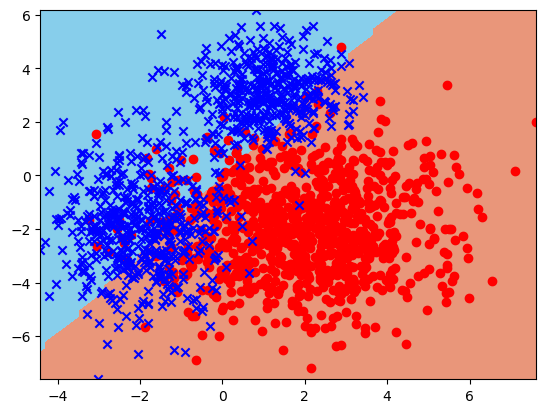

In [33]:
perceptron1 = ClassifierPerceptron(2, best_lr, init=False)
X_train, Y_train, X_val, Y_val = crossval_strat(X2D, Y2D, 10, which_i)
perceptron1.train(X_train, Y_train)
print("Accuracy : ", perceptron1.accuracy(X_val,Y_val))

# Affichage de la frontière de séparation des classes
plot_frontiere(X_train,Y_train,perceptron1,step=60)
plot2DSet(X_train,Y_train)

<div class="alert alert-block alert-info">On trouve des valeurs similaires à l'initialisation à zéro. Il n'y pas d'impact sur le réglage de l'initisialisation pour ces données 2D avec ce modèle.</div>


#### Convergence du modèle

On teste d'abord sans initialiser le paramètre nb_max puis ensuite avec différentes valeurs jusqu'à ce que le modèle converge.

Nb iterations:  100


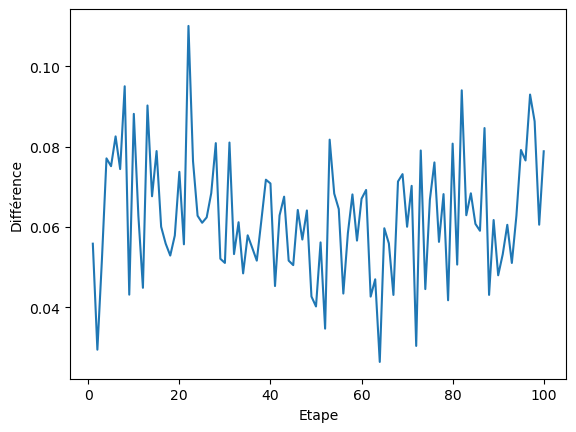

Accuracy finale (train):  0.86
Accuracy finale (test) :  0.8366666666666667


In [34]:
learning_rate = 0.01
perceptron = ClassifierPerceptron(2, learning_rate, False)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations =  perceptron.train(data_train, label_train)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )


Nb iterations:  1000


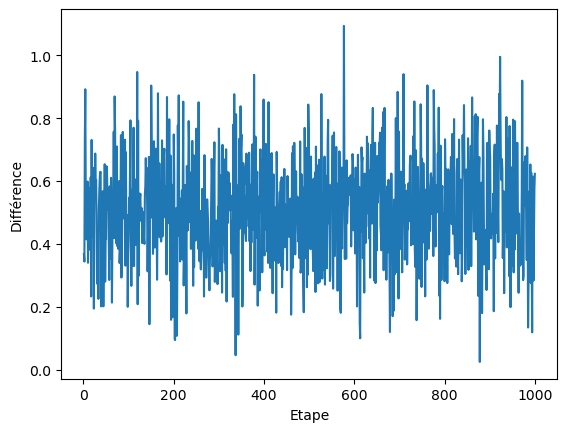

Accuracy finale (train):  0.8
Accuracy finale (test) :  0.8255555555555556


In [35]:
learning_rate = 0.1
perceptron = ClassifierPerceptron(2, learning_rate, False)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X2D, Y2D,100,100)
data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


# Apprentissage du perceptron
les_variations = perceptron.train(data_train, label_train, nb_max=1000)
print("Nb iterations: ",len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )



<div class="alert alert-block alert-info">On observe que le meilleur paramètre est un learning rate à 0.1 et que l'initialisation du vecteur de paramètres a peu d'impact sur les performances et la convergence. Testons le modèle avec ces valeurs et une validation croisée à 10 itérations:</div>

In [36]:
niter = 10
accurarcies = []
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
tps1 = time.time()
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = ClassifierPerceptron(2, 0.1, True)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))
tps2 = time.time()

print("Accuracies ",accuracies)

Accuracies  [0.84, 0.905, 0.93, 0.685, 0.66, 0.94, 0.875, 0.425, 0.825, 0.98, 0.835, 0.81, 0.81, 0.805, 0.805, 0.76, 0.725, 0.835, 0.845, 0.89]


In [37]:
print("Temps d'éxecution pour tester le modèle avec des données 2D et un algorithme de Perceptron : ", tps2-tps1)

Temps d'éxecution pour tester le modèle avec des données 2D et un algorithme de Perceptron :  9.888045310974121


In [38]:
print(analyse_perfs(accuracies))

(0.8092499999999999, 0.11822938509524608)


<div class="alert alert-block alert-info">On obtiens une moyenne lègerement inférieure mais un meilleur écart-type qu'avec l'algorithme des k plus proches voisins pour les données 2D. Le temps d'éxecution pour tester le modèle est plus grand qu'avec l'algo KNN.</div>


## Données 5D

### 1er cas : vecteur nul

In [39]:
perceptron1 = ClassifierPerceptron(5, learning_rate=1, init=True)

perceptron1.train(X5D, Y5D)
print("Accuracy : ", perceptron1.accuracy(X5D,Y5D))



Accuracy :  0.7665


In [40]:
lrs = [0.01, 0.1, 1]

# Validation croisée pour chaque learning rate
best_lr = None
best_acc = 0
which_i = 0
for lr in lrs:
    accuracies = []
    for i in range(10):
        X_train, Y_train, X_val, Y_val = crossval_strat(X5D, Y5D, 10, i)
        perceptron = ClassifierPerceptron(5, lr, True)
        perceptron.train(X_train, Y_train)
        accuracy = perceptron.accuracy(X_val, Y_val)
        accuracies.append(accuracy)
        if accuracy> best_acc:
            best_acc = accuracy
            best_lr = lr
            which_i = i

print("Learning rate optimal :", best_lr)
print("Meilleure accuracy :", best_acc)
print("Pour l'itération : ", i)

Learning rate optimal : 1
Meilleure accuracy : 0.895
Pour l'itération :  9


In [41]:
perceptron1 = ClassifierPerceptron(5, best_lr, init=True)
X_train, Y_train, X_val, Y_val = crossval_strat(X5D, Y5D, 10, which_i)
perceptron1.train(X_train, Y_train)
print("Accuracy : ", perceptron1.accuracy(X_val,Y_val))


Accuracy :  0.87


#### Convergence du modèle

Nb iterations:  2000


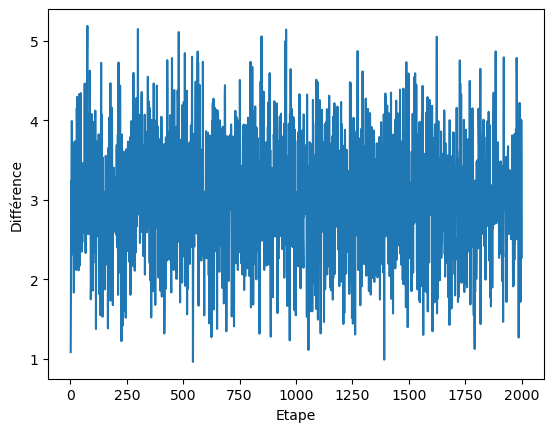

Accuracy finale (train):  0.885
Accuracy finale (test) :  0.875


In [42]:
learning_rate = 0.5
perceptron = ClassifierPerceptron(5, learning_rate, True)

(train_desc, train_label), (test_desc, test_label) = genere_train_test(X5D, Y5D,100,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations =  perceptron.train(data_train, label_train, nb_max=2000)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )


Nb iterations:  2000


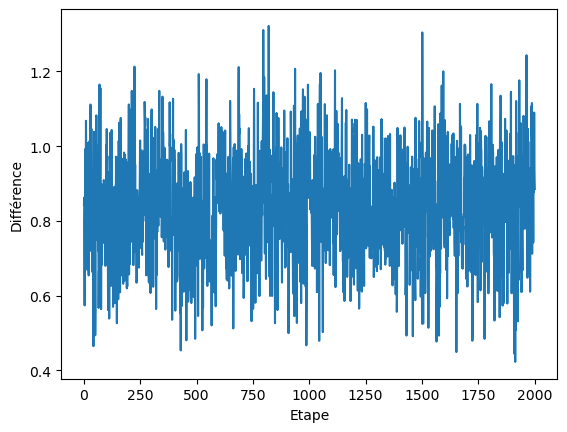

Accuracy finale (train):  0.885
Accuracy finale (test) :  0.8555555555555555


In [43]:
learning_rate = 0.1
perceptron = ClassifierPerceptron(5, learning_rate, True)

# Définition des données d'apprentissage
(train_desc, train_label), (test_desc, test_label) = genere_train_test(X5D, Y5D,100,100)
data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


# Apprentissage du perceptron
les_variations = perceptron.train(data_train, label_train, nb_max=2000)
print("Nb iterations: ",len(les_variations) )

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test)  )



In [44]:
niter = 10
accuracies = []
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
tps1 = time.time()
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = ClassifierPerceptron(5, 0.1, True)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))
tps2 = time.time()

print("Accuracies ",accuracies)

Accuracies  [0.85, 0.865, 0.785, 0.835, 0.775, 0.84, 0.86, 0.88, 0.815, 0.905]


In [45]:
print("Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron : ", tps2-tps1)

Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron :  9.600285291671753


In [46]:
print(analyse_perfs(accuracies))

(0.8409999999999999, 0.038522720568516446)


<div class="alert alert-block alert-info"><b>Pour les données en 5D</b>, on observe que la moyenne des performances est proche de celle que les données 2D. Le temps d'execution est similaire qu'avec les données 2D. L'écart type reste toujours largement supérieur à celui de l'algorithme des plus proches voisins mais on remarque que la moyenne des  performances n'est pas toujours meilleures que ceux du KNN.</div>

### 2eme cas : vecteur aléatoire
Voyons rapidement si l'initialisation a un impact pour les données 5D


In [47]:
niter = 10
accuracies = []
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
tps1 = time.time()
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = ClassifierPerceptron(5, 0.1, False)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))
tps2 = time.time()

print("Accuracies ",accuracies)

Accuracies  [0.79, 0.875, 0.89, 0.82, 0.79, 0.805, 0.84, 0.88, 0.89, 0.83]


In [48]:
print(analyse_perfs(accuracies))

(0.841, 0.038131351929875226)


<b>On obtient à peu près les mêmes valeurs donc non, encore une fois l'initialisation du vecteur de paramètre n'a pas d'impact pour les données 5D et le modèle d'apprentissage de Perceptron.</b>


# Perceptron biais

In [49]:
class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        #print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        # Ne pas oublier d'ajouter les poids à allw avant de terminer la méthode
        l = [i for i in range (len(desc_set))]
        desc_rand = np.random.shuffle(l)
        for i in l:
            if (self.score(desc_set[i]) * label_set[i])<1:
                self.w += desc_set[i]*self.learning_rate*(label_set[i]-self.score(desc_set[i]))
                self.allw.append(np.copy(self.w))   

## Données 2D

<div class="alert alert-block alert-info">Pour le perceptron biais, nous allons tracer les courbes des coûts, des poids. A la fin, on testera le modèle avec la validation croisée pour tester le taux de bonne classification.
</div>

#### Courbe de coût 

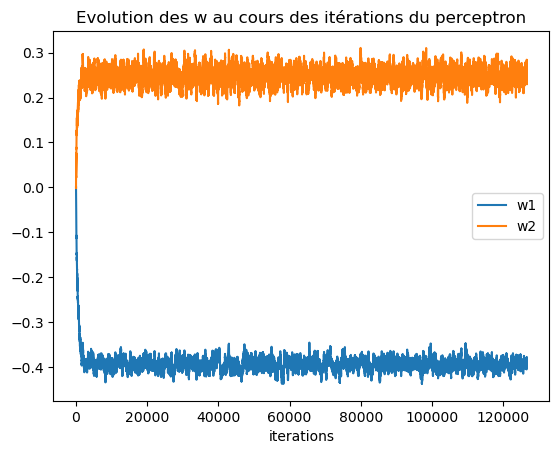

In [50]:
# Paramètres pour le perceptron:
dim = 2
eps = 0.001    # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Création et entraînement du perceptron sur les données générées
perceptron_biais = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron_biais.train(X2D, Y2D)

allw = np.array(perceptron_biais.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


<div class="alert alert-block alert-info">Les valeurs des coordonnées du vecteur de poids restent constantes au cours des itérations du perceptron. Le modèle a bien convergé.</div>

#### Evolution des couts

Text(0.5, 1.0, 'Evolution des couts')

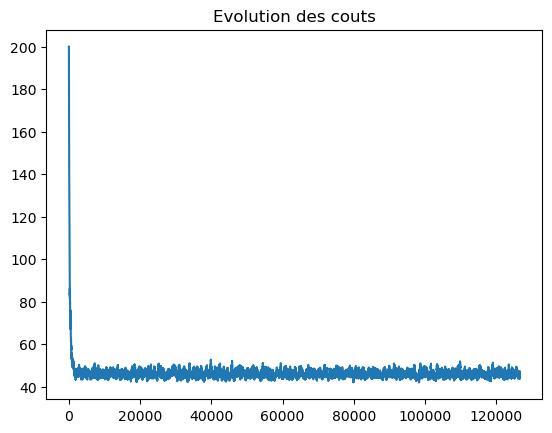

In [51]:
#on considère les poids de perceptron_biais généré précédemment ::
allw = np.array(perceptron_biais.get_allw()) 

couts = []
for w in allw:
    c =0
    for i in range(int(len(X2D)/10)):
        ci = 1 - np.dot(X2D[i], w)*Y2D[i]
        if ci > 0: 
            c += ci
    couts.append(c)
plt.plot(couts)
plt.title('Evolution des couts')


#### Evolution des poids dans l'espace des paramètres

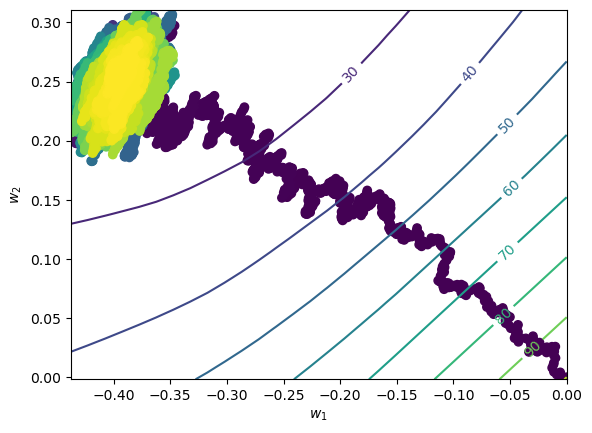

In [52]:
# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

res = []
for w in grid:
    c =0
    for i in range(int(len(X2D)/20)):
        ci = 1 - np.dot(X2D[i], w)*Y2D[i]
        if ci > 0: 
            c += ci
    res.append(c)
res=np.array(res)

##########

# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))


In [53]:
niter = 10
accuracies = []
index = np.random.permutation(len(X2D)) # mélange des index
Xm = X2D[index]
Ym = Y2D[index]
tps1 = time.time()
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = ClassifierPerceptronBiais(2, 0.1, True)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))
tps2 = time.time()

print("Accuracies ",accuracies)

Accuracies  [0.63, 0.745, 0.78, 0.595, 0.815, 0.84, 0.68, 0.79, 0.88, 0.84]


Accuracy :  0.53


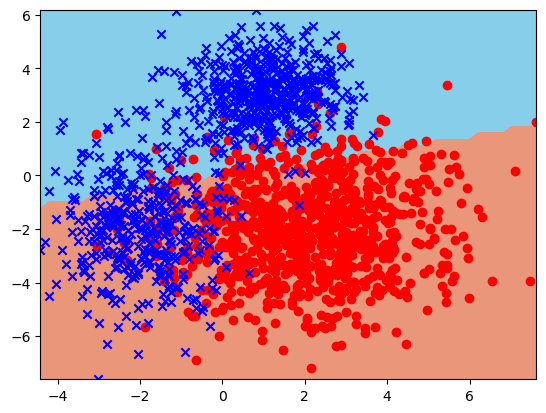

In [54]:
X_train, Y_train, X_val, Y_val = crossval_strat(X2D, Y2D, 10, 0)
perceptron.train(X_train, Y_train)
print("Accuracy : ", perceptron.accuracy(X_val,Y_val))

# Affichage de la frontière de séparation des classes
plot_frontiere(X_train,Y_train,perceptron,step=60)
plot2DSet(X_train,Y_train)

In [55]:
print("Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron : ", tps2-tps1)

Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron :  5.607014179229736


In [56]:
analyse_perfs(accuracies)

(0.7595, 0.0907041895394033)

## Données 5D

#### Courbe de coût 

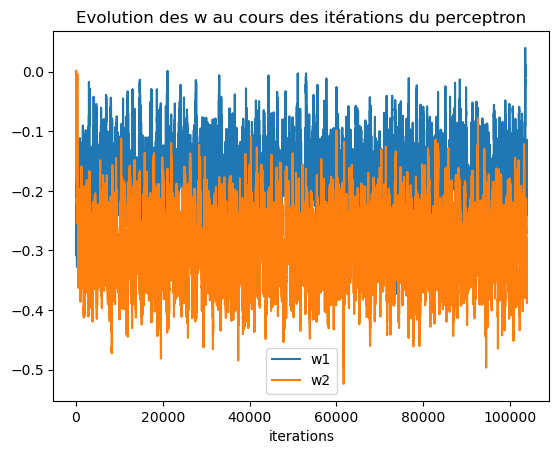

In [57]:
# Paramètres pour le perceptron:
dim = 5
eps = 0.01    #### Courbe de coût # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Création et entraînement du perceptron sur les données générées
perceptron_biais = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron_biais.train(X5D, Y5D)

allw = np.array(perceptron_biais.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Les courbes ne sont pas très visibles car le modèle converge trop rapidement, changeons les paramètres d'initialisation comme le learning rate par exemple. 

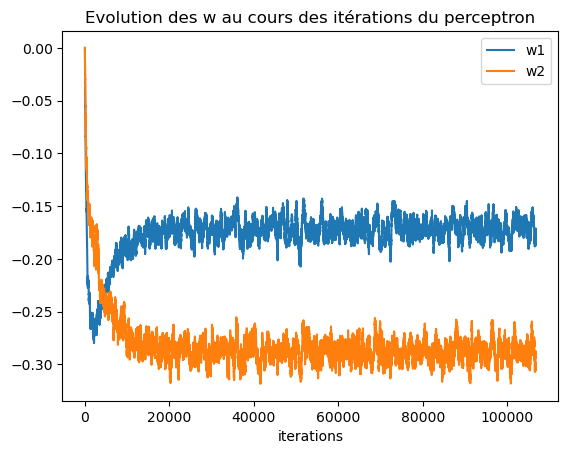

In [58]:
# Paramètres pour le perceptron:
dim = 5
eps = 0.001    #### Courbe de coût # learning rate
poids_0 = True   # valeur initiale des poids à 0

# Création et entraînement du perceptron sur les données générées
perceptron_biais = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron_biais.train(X5D, Y5D)

allw = np.array(perceptron_biais.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

<div class="alert alert-block alert-info">  On voit bien ici que les valeurs des paramètres de poids évoluent jusqu'à un certain nombre d'itérations (environ 20 000) avant de se stabiliser. Un learning rate plus petit permet une meilleure convergence du modèle.</div>

#### Evolution des couts

Text(0.5, 1.0, 'Evolution des couts')

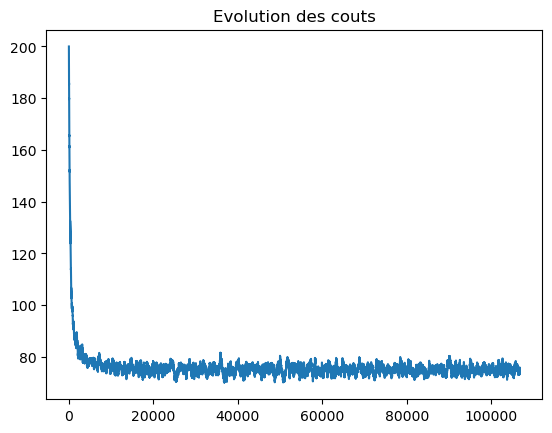

In [59]:
#on considère les poids de perceptron_biais généré précédemment ::
allw = np.array(perceptron_biais.get_allw()) 

couts = []
for w in allw:
    c =0
    for i in range(int(len(X5D)/10)):
        ci = 1 - np.dot(X5D[i], w)*Y5D[i]
        if ci > 0:
            c += ci
    couts.append(c)
plt.plot(couts)
plt.title('Evolution des couts')


<div class="alert alert-block alert-info">Tous comme pour les données 2D, les coûts de l'algorithme diminuent au fil des itérations. Cependant la valeur minimum est légérement plus élévée que pour les données 2D ce qui s'explique par le fait que l'espace des paramètres est plus grand.</div>

#### Evolution des poids dans l'espace des paramètres

 **Nous prenons 2 dimensions parmi les 5 pour pouvoir représenter un cas d'évolution ici x3 et x4**

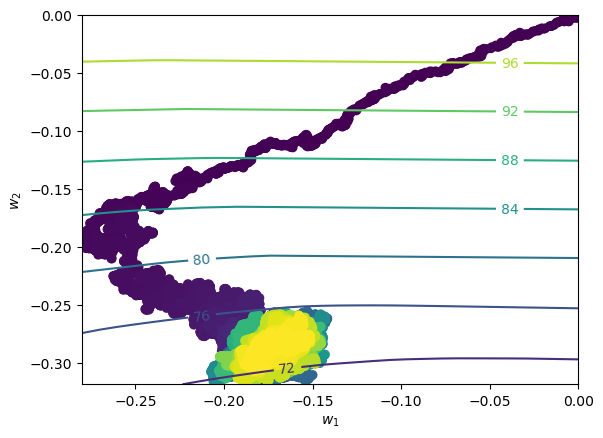

In [60]:
X5D12 = np.array(data5D[['x3', 'x4']], dtype=float)
# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

res = []
for w in grid:
    c =0
    for i in range(int(len(X5D12)/20)):
        ci = 1 - np.dot(X5D12[i], w)*Y5D[i]
        if ci > 0: 
            c += ci
    res.append(c)
res=np.array(res)
##########

# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

<div class="alert alert-block alert-info">Pour les données du dataset 5D des colonnes x3 et x4 nous voyons bien que l'algorithme fait évoluer les valeurs de poids (entre 0,14 et 0.20 pour w1 et 0.26 et 0.35 pour w2) pour différents classifieurs vers le coûts le moins élévé possible.
</br>
Regardons si c'est toujours le cas pour d'autres colonnes du dataset.</div>

**Pour x1 et x2**

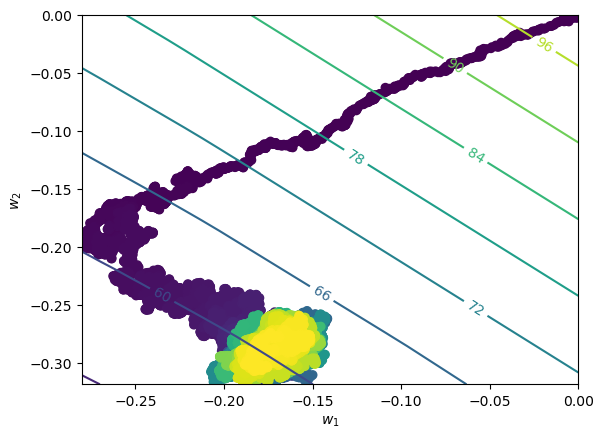

In [61]:
X5D12 = np.array(data5D[['x1', 'x2']], dtype=float)
# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

res = []
for w in grid:
    c =0
    for i in range(int(len(X5D12)/20)):
        ci = 1 - np.dot(X5D12[i], w)*Y5D[i]
        if ci > 0: 
            c += ci
    res.append(c)
res=np.array(res)
##########

# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

**Conclusion sur la précision de l'algorithme d'apprentissage du Perceptron Biais :**
<div class="alert alert-block alert-info">
Meme résultats et conclusion pour les colonnes x1 et x2 et l'algo fait ici évoluer les paramètres vers des coûts encore plus faible donc la précision est meilleure pour les valeurs des colonnes x1 et x2. On peut donc en déduire que l'algorithme de Perceptron Bias est plutôt juste dans ses prédictions. C'est un bon algorithme d'apprentissage pour les données 2D et 5D.</div>

In [62]:
niter = 10
accuracies = []
index = np.random.permutation(len(X5D)) # mélange des index
Xm = X5D[index]
Ym = Y5D[index]
tps1 = time.time()
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = ClassifierPerceptronBiais(5, 0.1, True)
    perceptron.train(Xapp, Yapp)
    accuracies.append(perceptron.accuracy(Xtest, Ytest))
tps2 = time.time()

print("Accuracies ",accuracies)

Accuracies  [0.855, 0.795, 0.87, 0.385, 0.7, 0.815, 0.83, 0.695, 0.875, 0.885]


In [63]:
print("Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron : ", tps2-tps1)

Temps d'éxecution pour tester le modèle avec des données 5D et un algorithme de Perceptron :  5.356538772583008


In [64]:
analyse_perfs(accuracies)

(0.7705, 0.14369150983965615)

In [65]:
tps4 = time.time()
print("temps d'execution total : ", tps4-tps3)

temps d'execution total :  566.5741670131683


# Conclusion

### Données 2D

Meilleur moyenne des performance : **Algo KNN** </br> 
Ecart-type le plus faible : **Algo KNN** </br> 
Temps d'éxecution le plus faible : **Perceptron Biais** </br> 

### Données 5D

Meilleur performance : **Perceptron Biais**</br> 
Ecart-type le plus faible : **Algo KNN**</br> 
Temps d'éxecution le plus faible : **Perceptron Biais**</br> 

<div class="alert alert-block alert-info">On observe que pour les données de notre <b>dataset 2D</b>, l'algorithme des K plus proches voisins nous donne de meilleures moyennes de performances lorsqu'on trouve un k optimal par rapport à l'algorithme de Perceptron, même si les moyennes de performances sont très proches pour chaque algorithme.</br></br>
Pour les données de notre <b>dataset 5D</b> , l'algorithme de Perceptron Biais nous donne de meilleures moyennes de performances avec différentes valeur de learning rate. Cependant la valeur minimum des coûts est meilleure pour les données 2D que pour les données 5D. </br>

Notons, quand même que ces résultats ne sont pas généraux et universels pour tout type de données. Nous avons bien vu que selon les dimensions des données et selon les paramètres d'initialisation des algorithmes, nous obtenons des résultats différents.</br>

<b>Le choix du meilleur algorithme doit être fait selon les différents critères que nous avons étudié sur les algorithmes mais aussi selon les données étudiées.<b></div>